In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd, norm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import h5py
import os

# define class labels
labels = {
    0: "0", 
    1: "1", 
    2: "2", 
    3: "3", 
    4: "4", 
    5: "5", 
    6: "6", 
    7: "7", 
    8: "8",
    9: "9"
}

# load the dataset
with h5py.File(os.path.join(os.getcwd(), 'usps.h5'), 'r') as hf:
        train = hf.get('train')
        test = hf.get('test')        
        x_train = pd.DataFrame(train.get('data')[:]).T
        y_train = pd.DataFrame(train.get('target')[:]).T
        x_test = pd.DataFrame(test.get('data')[:]).T
        y_test = pd.DataFrame(test.get('target')[:]).T
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(256, 7291)
(1, 7291)
(256, 2007)
(1, 2007)


In [ ]:
alpha_matrices={}
for i in range(10):
    alpha_matrices.update({"A"+str(i):x_train.loc[:,list(y_train.loc[0,:]==i)]})
    print(alpha_matrices['A0'].shape)

(256, 1194)
(256, 1194)
(256, 1194)
(256, 1194)
(256, 1194)
(256, 1194)
(256, 1194)
(256, 1194)
(256, 1194)
(256, 1194)


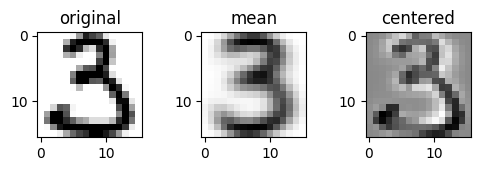

In [ ]:
# digit: 3
ori_3 = alpha_matrices['A3'][4]           # select the first digit from 3
mean_3 = np.mean(alpha_matrices['A3'], axis=1)
centered_3 = ori_3 - mean_3

plt.figure(figsize=(6, 3))
columns = 3
list_pic = [ori_3, mean_3, centered_3]
title_3 = ['original', 'mean', 'centered']
for i in range(3):
   plt.subplot(int(3/ columns + 1), columns, i + 1)
   plt.imshow(np.array(list_pic[i]).reshape(16,16),cmap='binary')
   plt.title(title_3[i])

In [ ]:
alpha_matrices['A3'].shape

(256, 658)

In [ ]:
digit_3 = alpha_matrices['A3']
u, s, v_t = svd(digit_3, full_matrices=False)
u.shape, s.shape, v_t.shape

((256, 256), (256,), (256, 658))

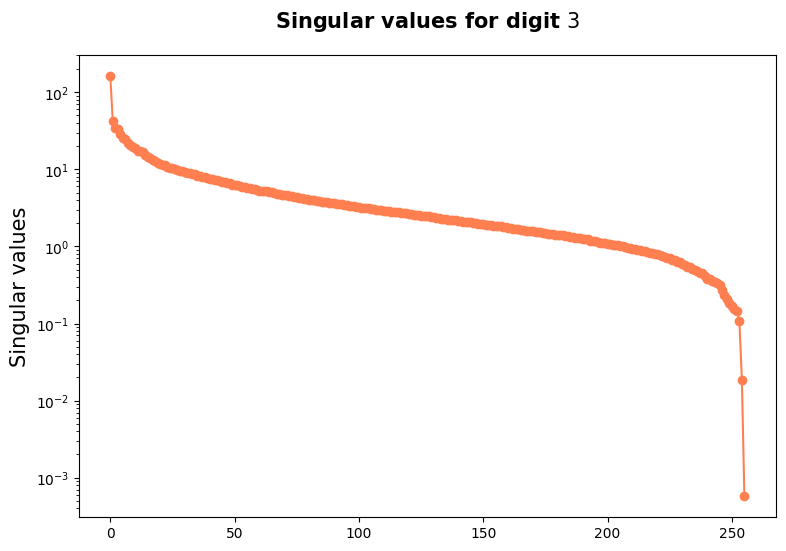

In [ ]:
plt.figure(figsize = (9, 6))
plt.plot(s, color='coral', marker='o')
plt.title('Singular values for digit $3$',fontsize=15,weight='bold',pad=20)
plt.ylabel('Singular values' ,fontsize=15)
plt.yscale('log')
plt.show()

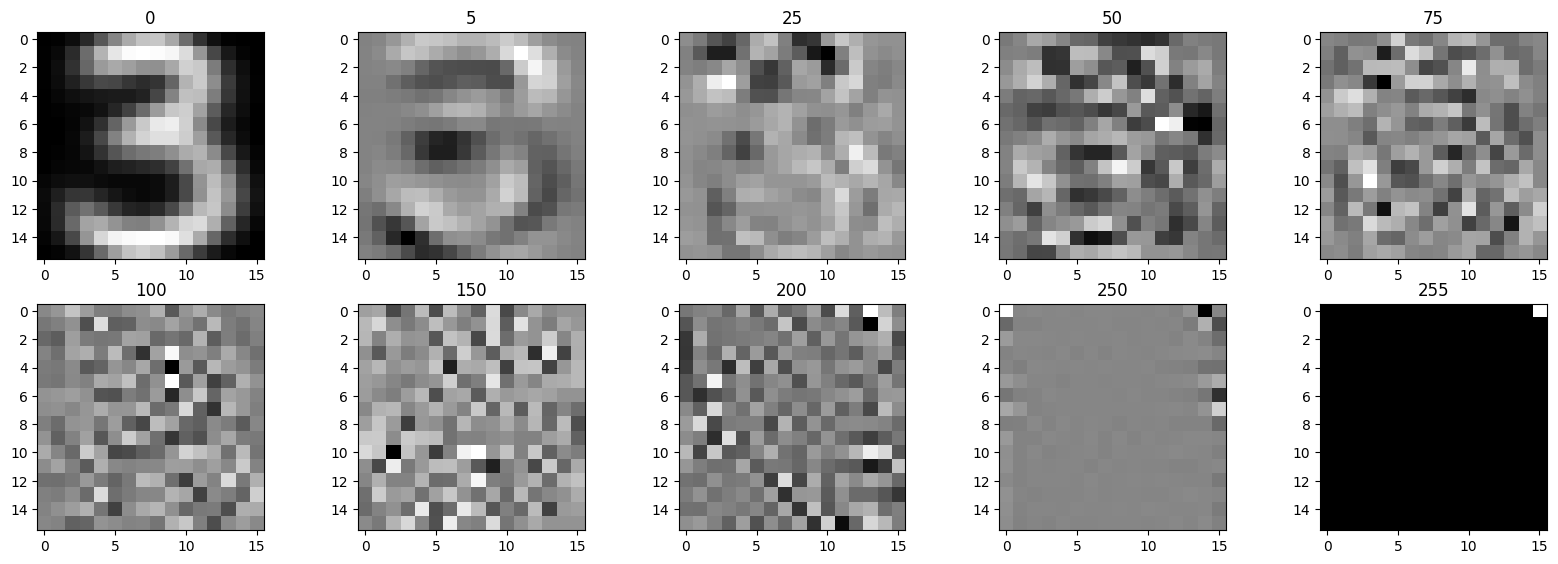

In [ ]:
plt.figure(figsize=(20,10))
columns = 5
j = [0, 5, 25, 50, 75, 100, 150, 200, 250, 255]
for i in range(10):
   plt.subplot(int(10/ columns + 1), columns, i + 1)
   plt.imshow(u[:, j[i]].reshape(16,16),cmap='binary')
   plt.title(j[i])

In [ ]:
def EV_i(i, eigenvalues):
    return eigenvalues[i] / np.sum(eigenvalues)

def CEV_d(d, eigenvalues):
    eigenvalues_d_sum = 0
    for i in range(d):
        eigenvalues_d_sum += eigenvalues[i]
    return eigenvalues_d_sum / np.sum(eigenvalues)

In [ ]:
EV = []
CEV = []

for i in range(len(s)):
    EV.append(EV_i(i, s))
    CEV.append(CEV_d(i, s))

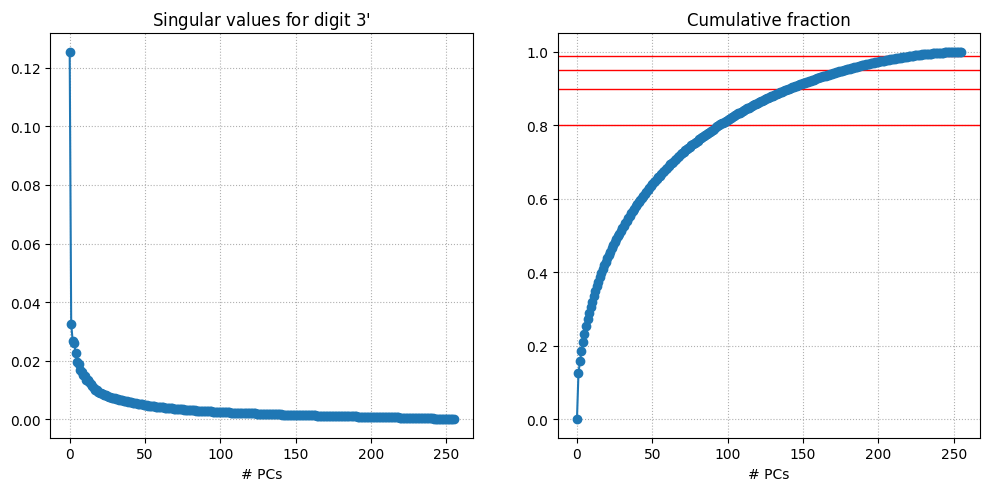

In [ ]:
# plot EV/CEVs
fig = plt.figure(figsize=(12,5.25))

plt.subplot(121)
plt.title("Singular values for digit $3$'")
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(EV, "o-")

plt.subplot(122)
plt.title("Cumulative fraction")
plt.axhline(linewidth=1, y=0.99, color='r')
plt.axhline(linewidth=1, y=0.95, color='r')
plt.axhline(linewidth=1, y=0.9, color='r')
plt.axhline(linewidth=1, y=0.8, color='r')
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(CEV, "o-")

In [ ]:
n_var_95 = np.argmax(np.array(CEV) >= 0.95) 
n_var_95

177

In [ ]:
CEV[175:180]

[0.947826151587939,
 0.948986822353259,
 0.9501310475912137,
 0.9512688312683577,
 0.9524003445917396]

In [ ]:
256-177

79

In [ ]:
u.shape, s.shape,  v_t.shape

((256, 256), (256,), (256, 658))

In [ ]:
u_q = u[:, : n_var_95+1]
s_q = s[: n_var_95+1]
v_t_q = v_t[: n_var_95+1, :]

In [ ]:
u_q.shape, s_q.shape, v_t_q.shape

((256, 178), (178,), (178, 658))

In [ ]:
Y_q = np.diag(s_q) @ v_t_q
Y_q.shape

(178, 658)

In [ ]:
X_bar = u_q @ Y_q
X_bar.shape

(256, 658)

In [ ]:
X_bar_i = X_bar[:, 0]

X_hat = mean_3 + X_bar_i

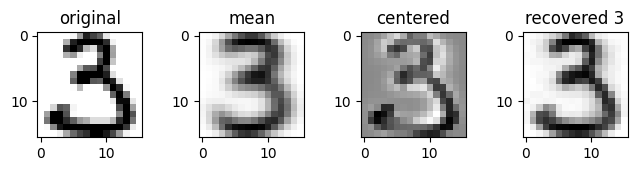

In [ ]:
# digit: 3
ori_3 = alpha_matrices['A3'][4]           # select the first digit from 3
mean_3 = np.mean(alpha_matrices['A3'], axis=1)
centered_3 = ori_3 - mean_3

plt.figure(figsize=(8, 3))
columns = 4
list_pic = [ori_3, mean_3, centered_3, X_hat]
title_3 = ['original', 'mean', 'centered', 'recovered 3']
for i in range(4):
   plt.subplot(int(4/ columns + 1), columns, i + 1)
   plt.imshow(np.array(list_pic[i]).reshape(16,16),cmap='binary')
   plt.title(title_3[i])